## Kiva - Понимание Уровней Бедности Заемщиков

Kiva — это международная некоммерческая организация с миссией соединять людей через кредитование для облегчения бедности. Для установления приоритетов инвестиций, информирования кредиторов и понимания целевых сообществ критически важно знать уровень богатства или бедности каждого заемщика.

В первом вызове "Data Science for Good" от Kaggle Datasets, Kiva приглашает сообщество Kaggle оценить и описать уровни благосостояния жителей в определенных регионах, используя исторические данные о займах в сочетании с внешними источниками данных.

Цель этой записной книжки — провести анализ уровней бедности (измеряемых по индексу MPI) заемщиков, соединив набор данных о займах Kiva с набором данных MPI.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Kiva Loans dataset**

In [2]:
kiva_loans=pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
print(kiva_loans.shape)
kiva_loans.sample(5)

(671205, 20)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
240223,1088800,325.0,325.0,Clothing,Clothing,purchase more clothes and shoes to sell at my ...,KE,Kenya,NaN,KES,NaN,2015-05-19 08:02:05+00:00,2015-07-01 11:32:00+00:00,2015-06-24 20:39:55+00:00,7.0,20,NaN,female,weekly,2015-05-19
563967,1224628,250.0,250.0,General Store,Retail,to purchase additional stocks of groceries inc...,PH,Philippines,"Brookes Point, Palawan",PHP,145.0,2017-01-23 03:43:27+00:00,2017-01-17 08:00:00+00:00,2017-01-23 12:25:47+00:00,8.0,4,#Woman Owned Biz,female,irregular,2017-01-23
460247,1120056,1025.0,1025.0,Health,Health,to pay for more medicinal drugs,SL,Sierra Leone,Freetown East,SLL,148.0,2016-07-20 15:49:45+00:00,2016-06-24 07:00:00+00:00,2016-07-31 02:06:46+00:00,8.0,14,"#Health and Sanitation, user_favorite, user_fa...","female, female, female, female",monthly,2016-07-20
424909,1072125,100.0,100.0,Higher education costs,Education,to pay for a fast food training course.,CO,Colombia,Medellín,COP,177.0,2016-05-19 21:29:40+00:00,2016-04-19 07:00:00+00:00,2016-05-26 07:56:19+00:00,8.0,1,#Schooling,female,bullet,2016-05-19
213998,861991,525.0,525.0,General Store,Retail,to buy daily household-use items.,UG,Uganda,Ishaka,UGX,222.0,2015-03-26 07:57:37+00:00,2015-03-18 07:00:00+00:00,2015-04-29 04:00:44+00:00,10.0,16,"volunteer_pick, #Parent",male,monthly,2015-03-26


**Kiva MPI dataset**

In [3]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

DataFrame имеет 671205 строк и 20 столбцов. Вот описание каждого столбца:

1. `id`: Уникальный идентификатор займа (тип данных: int64).
2. `funded_amount`: Сумма, финансируемая кредиторами (тип данных: float64).
3. `loan_amount`: Общая сумма займа (тип данных: float64).
4. `activity`: Вид деятельности, на которую направлен займ (тип данных: object).
5. `sector`: Сектор экономики, к которому относится займ (тип данных: object).
6. `use`: Описание того, как будут использоваться средства займа (тип данных: object).
7. `country_code`: Код страны (тип данных: object).
8. `country`: Название страны (тип данных: object).
9. `region`: Регион в стране (тип данных: object).
10. `currency`: Валюта займа (тип данных: object).
11. `partner_id`: Идентификатор партнера Kiva (тип данных: float64).
12. `posted_time`: Время публикации займа (тип данных: object).
13. `disbursed_time`: Время выдачи займа (тип данных: object).
14. `funded_time`: Время полного финансирования займа (тип данных: object).
15. `term_in_months`: Срок займа в месяцах (тип данных: float64).
16. `lender_count`: Количество кредиторов (тип данных: int64).
17. `tags`: Теги, связанные с займом (тип данных: object).
18. `borrower_genders`: Пол заемщиков (тип данных: object).
19. `repayment_interval`: Интервал погашения займа (тип данных: object).
20. `date`: Дата займа (тип данных: object).


In [4]:
kiva_mpi_region_locations=pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")
print(kiva_mpi_region_locations.shape)
kiva_mpi_region_locations.sample(10)

(2772, 9)


,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
1513,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1736,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
377,"Grande-Anse, Haiti",HTI,Haiti,Grande-Anse,Latin America and Caribbean,0.378,"(18.5489259, -74.07701)",18.548926,-74.077010
2371,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1828,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1941,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1506,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1485,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1879,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
268,"Somali, Ethiopia",ETH,Ethiopia,Somali,Sub-Saharan Africa,0.647,"(6.6612293, 43.7908453)",6.661229,43.790845


В случайной выборке из 10 строк выше мы видим несколько строк со значениями NaN и значение (1000.0, 1000.0) в столбце geo. Удивительно, что таких строк так много, интересно, почему. Возможно, что-то не так с данными? Нам придется провести очистку, чтобы удалить эти строки, но сначала давайте исследуем это.


In [5]:
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


DataFrame содержит 2772 строки и 9 столбцов. Вот описание каждого столбца:

1. `LocationName`: Название местоположения (тип данных: object). Имеет 984 ненулевых записей.
2. `ISO`: Международный стандартный код страны (тип данных: object). Имеет 1008 ненулевых записей.
3. `country`: Название страны (тип данных: object). Имеет 1008 ненулевых записей.
4. `region`: Название региона (тип данных: object). Имеет 984 ненулевых записей.
5. `world_region`: Название мирового региона (тип данных: object). Имеет 1008 ненулевых записей.
6. `MPI`: Индекс многофакторной бедности (тип данных: float64). Имеет 984 ненулевых записей.
7. `geo`: Географические координаты (тип данных: object). Все записи ненулевые.
8. `lat`: Широта (тип данных: float64). Имеет 892 ненулевых записей.
9. `lon`: Долгота (тип данных: float64). Имеет 892 ненулевых записей.

Общий объем памяти, используемый этим DataFrame, составляет 195.0 KB.


In [6]:
kiva_mpi_region_locations.isnull().sum()      

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

Из 2772 строк кажется, что 1788 не имеют пары данных "LocationName-MPI". Это 65%! Две трети этого набора данных практически пусты. Пока что давайте удалим эти строки. Похоже, что предоставленный Kiva набор данных MPI не даст нам богатого источника данных о бедности. Возможно, нам не стоит удивляться; в конце концов, вся эта задача на Kaggle заключается в поиске внешних источников данных и построении моделей для оценки уровней бедности в регионах, где Kiva имеет активные займы.

Пока что мы будем работать с тем, что у нас есть. Давайте очистим данные MPI.


In [7]:
mpi = kiva_mpi_region_locations[['country','region', 'MPI']]
mpi = mpi.dropna()
print(mpi.shape)
print(mpi.sample(5))

(984, 3)
      country         region    MPI
622    Malawi  Lilongwe City  0.092
759      Peru           Puno  0.069
443   Jamaica     Manchester  0.006
310    Gambia          Basse  0.524
466  Cambodia         Kandal  0.121


После удаления всех строк с NaN осталось 984 тройки страна-регион-MPI.

Теперь давайте очистим набор данных о займах. Мы удалим все строки с отсутствующими значениями страны или региона. Нам необходимо, чтобы страна и регион были указаны, чтобы мы могли объединить наш набор данных о займах с набором данных MPI.


In [8]:
loans = kiva_loans[['country','region','loan_amount','activity','sector','borrower_genders', 'repayment_interval']]
print(loans.shape)
loans = loans.dropna(subset = ['country','region'])
print(loans.shape)
loans.sample(5)

(671205, 7)
(614405, 7)


,country,region,loan_amount,activity,sector,borrower_genders,repayment_interval
580785,Kenya,Eldoret,200.0,Clothing Sales,Clothing,female,monthly
129450,Armenia,Meghrashat village,3000.0,Livestock,Agriculture,female,monthly
270679,Philippines,"Bogo, Cebu",350.0,Pigs,Agriculture,female,irregular
504789,Palestine,"Rafah city, Gaza Strip",2000.0,Shoe Sales,Retail,female,monthly
153683,Kenya,Nkubu,350.0,Dairy,Agriculture,male,monthly


После удаления строк с NaN из данных о займах у нас осталось 92% строк из первоначальных 671205 строк.

Теперь давайте обогатим данные о займах информацией из данных MPI.


In [9]:
d= pd.merge(loans, mpi, how='left')
d.count()

country               614405
region                614405
loan_amount           614405
activity              614405
sector                614405
borrower_genders      614405
repayment_interval    614405
MPI                    50955
dtype: int64

К сожалению, только небольшое количество записей о займах в наборе данных о займах было присвоено значение MPI. Из 614405 записей о займах мы смогли присвоить значение MPI только 50955 из них, что составляет всего лишь 8%.

Давайте пока сосредоточимся только на этих 8% записей о займах. Становится еще более очевидным, что нам нужно будет найти другую меру бедности, которую можно добавить к набору данных о займах!


In [10]:
d = d.dropna(subset=['MPI'])
d.sample(5)

,country,region,loan_amount,activity,sector,borrower_genders,repayment_interval,MPI
38766,Peru,Cusco,1275.0,Personal Medical Expenses,Health,male,irregular,0.062
528461,Nicaragua,Masaya,1000.0,Clothing Sales,Clothing,male,monthly,0.017
303028,Nigeria,Kaduna,50.0,Personal Expenses,Personal Use,male,bullet,0.311
256000,Nicaragua,Masaya,1725.0,Retail,Retail,"female, male, female",monthly,0.017
499651,Cambodia,Prey Veng,125.0,Home Appliances,Personal Use,"male, female, male",monthly,0.120


In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50955 entries, 47 to 614363
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             50955 non-null  object 
 1   region              50955 non-null  object 
 2   loan_amount         50955 non-null  float64
 3   activity            50955 non-null  object 
 4   sector              50955 non-null  object 
 5   borrower_genders    50955 non-null  object 
 6   repayment_interval  50955 non-null  object 
 7   MPI                 50955 non-null  float64
dtypes: float64(2), object(6)
memory usage: 3.5+ MB


Давайте начнем анализ!

Сначала мы рассчитаем среднюю сумму займа для всех займов по паре страна-регион.

MPI (Multidimensional Poverty Index - Многофакторный Индекс Бедности),


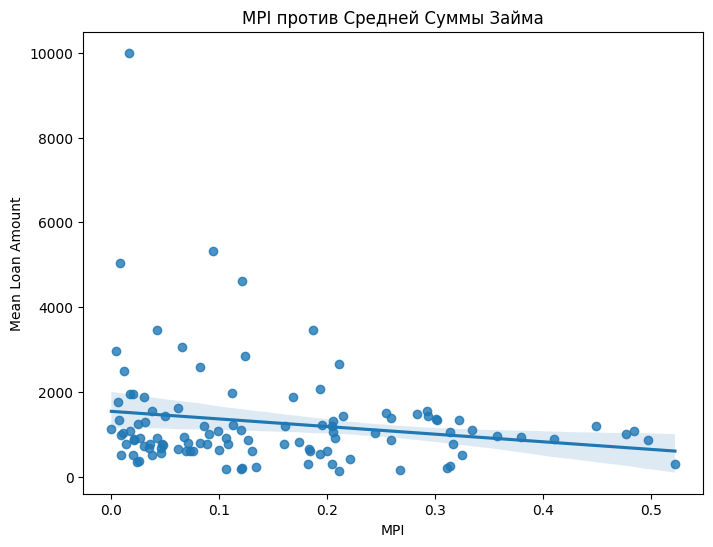

In [12]:


# Группировка данных по стране, региону и MPI, и расчет средней суммы займа
d1 = d.groupby(['country', 'region', 'MPI'])['loan_amount'].mean().reset_index(name='Mean Loan Amount')

# Создание визуализации
plt.figure(figsize=(8, 6))
sns.regplot(x=d1.MPI, y=d1['Mean Loan Amount'], fit_reg=True)

# Установка заголовка графика
plt.title("MPI против Средней Суммы Займа")

# Отображение графика
plt.show()


График предполагает, что чем выше индекс MPI региона, тем ниже средняя сумма займа, выданного региону.

Теперь давайте посмотрим на общую сумму всех займов, выданных каждому региону.


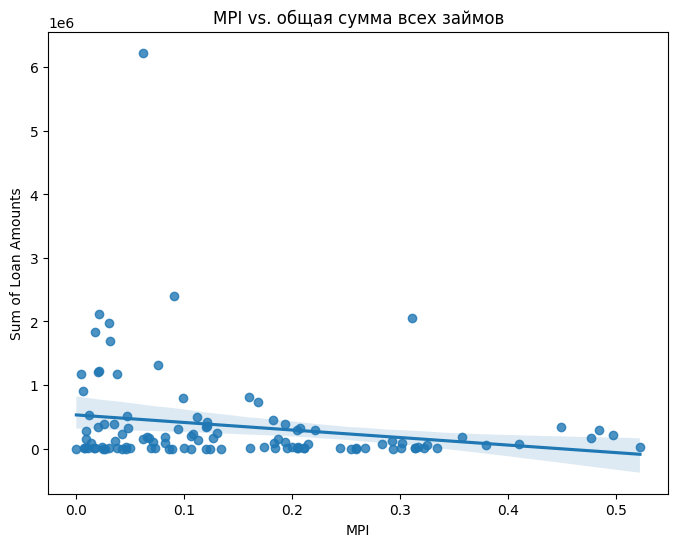

In [13]:
d2=d.groupby(['country','region','MPI'])['loan_amount'].sum().reset_index(name='Sum of Loan Amounts')
plt.figure(figsize=(8,6))
sns.regplot(x = d2.MPI, y = d2['Sum of Loan Amounts'], fit_reg=True)
plt.title("MPI vs. общая сумма всех займов")
plt.show()

Похожий результат, как и выше. Чем выше индекс MPI региона, тем ниже общая сумма займа, выданного региону.

Как насчет взаимосвязи между MPI и общим количеством займов, выданных каждому региону?


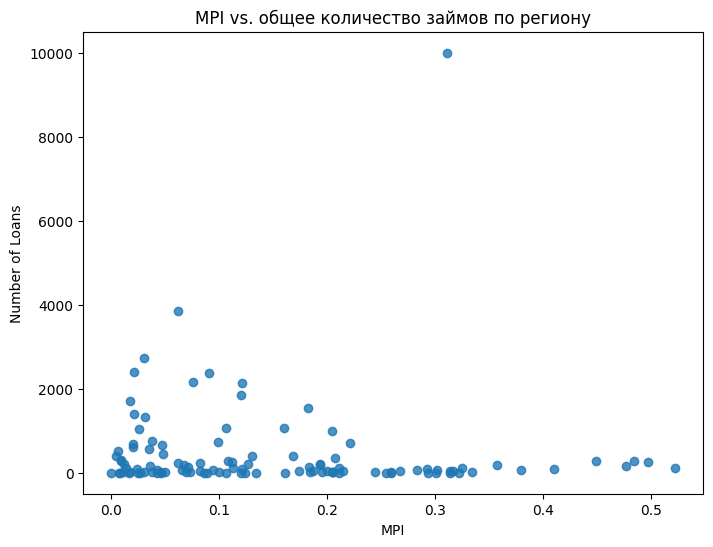

In [14]:
d3=d.groupby(['country','region','MPI'])['loan_amount'].count().reset_index(name='Number of Loans')
plt.figure(figsize=(8,6))
sns.regplot(x = d3.MPI, y = d3['Number of Loans'], fit_reg=False)
plt.title("MPI vs. общее количество займов по региону")
plt.show()

Есть очевидный выброс, регион с индексом MPI около 0.31 и большим количеством займов (примерно 10 000). Какой это регион?


In [15]:
d3.loc[d3['Number of Loans'] == d3['Number of Loans'].max()]

,country,region,MPI,Number of Loans
73,Nigeria,Kaduna,0.311,10000


Регион с самым большим количеством займов — это Нигерия, Кадуна. За исключением этого выброса, из графика видно, что чем ниже индекс MPI региона, тем выше количество займов.

Давайте попробуем визуализировать это немного по-другому.


In [16]:
d3['Location']=d3['country'] + ", " + d3['region']
d3 = d3.set_index(['Location'])

In [17]:
d3 = d3.sort_values("Number of Loans", ascending=False)
d3 = d3.loc[d3['Number of Loans']>20]

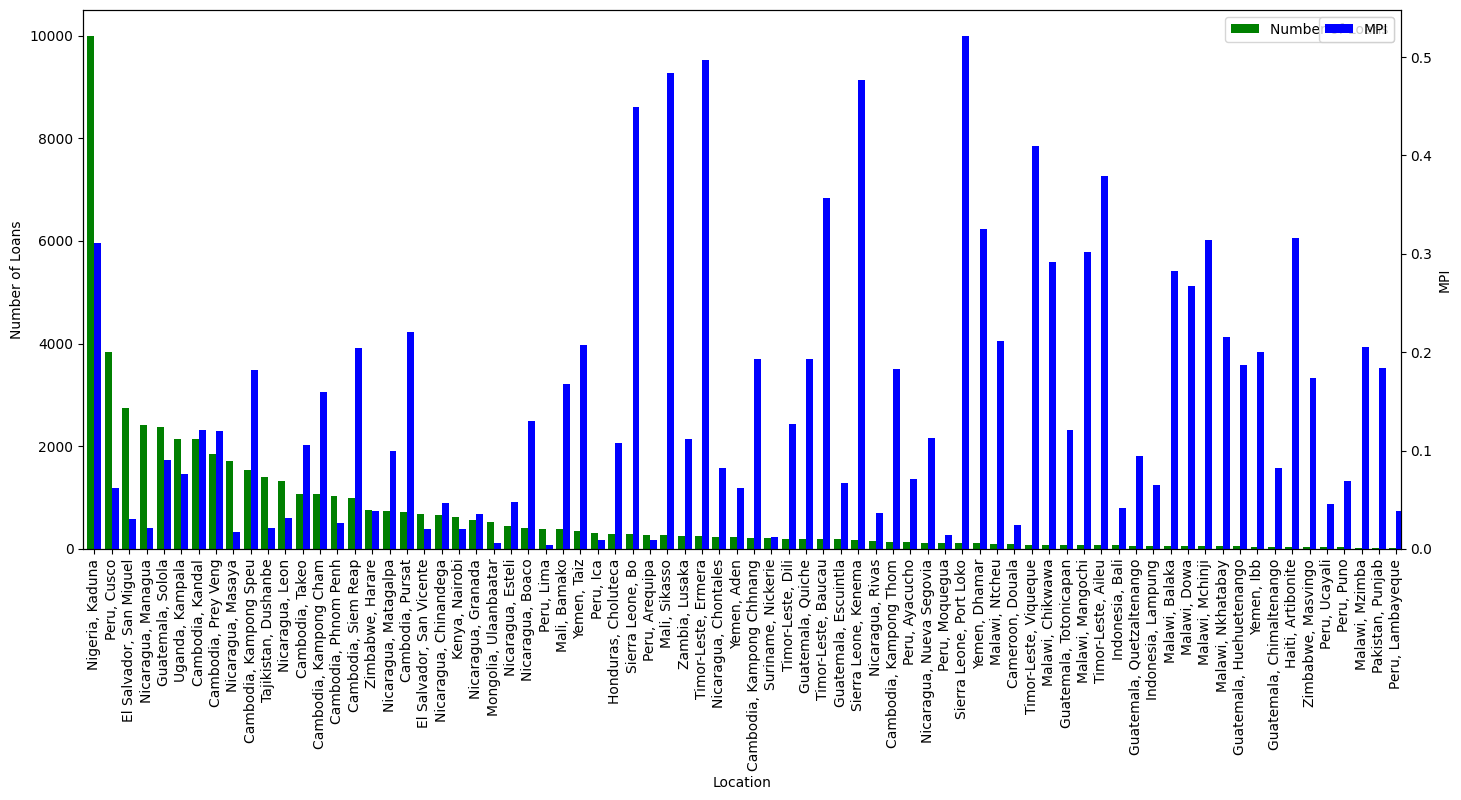

In [18]:


# Создание фигуры для визуализации
fig = plt.figure(figsize=(17, 7))
ax = fig.add_subplot(111)  # Создание основной оси координат для графика

ax2 = ax.twinx()  # Создание дополнительной оси координат, совместно использующей ось X с основной осью

# Построение графика MPI на дополнительной оси координат
d3[["MPI"]].plot(kind='bar', color='blue', ax=ax2, width=.4, position=0)

# Построение графика количества займов на основной оси координат
d3[["Number of Loans"]].plot(kind='bar', color='green', ax=ax, width=.4, position=1)

# Установка подписей осей Y
ax.set_ylabel('Number of Loans')  # Количество займов
ax2.set_ylabel('MPI')  # Индекс MPI

# Отображение графика
plt.show()


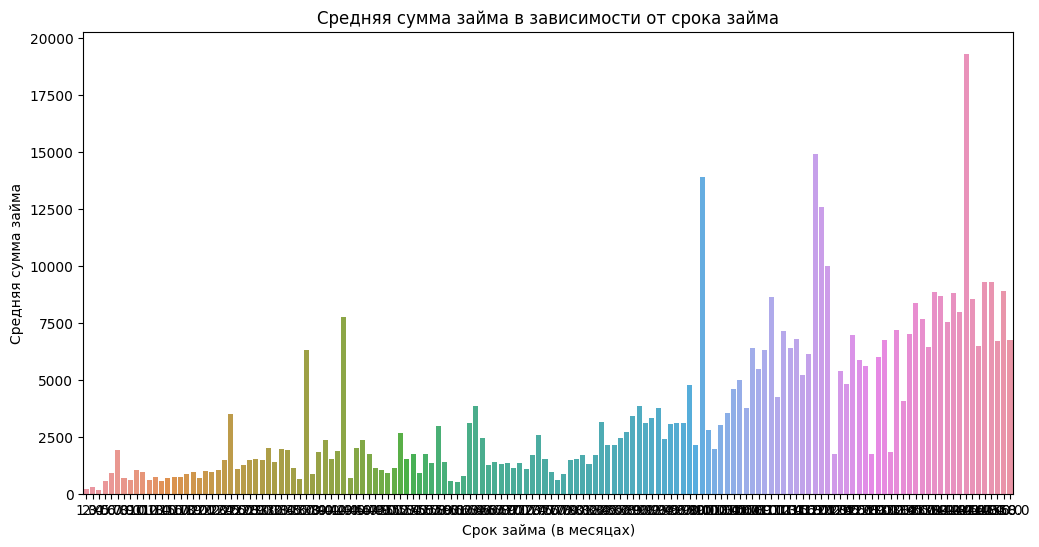

In [19]:


# Группировка данных по сроку займа и расчет средней суммы займа
grouped_data = kiva_loans.groupby('term_in_months')['loan_amount'].mean().reset_index()

# Создание визуализации
plt.figure(figsize=(12, 6))
sns.barplot(x='term_in_months', y='loan_amount', data=grouped_data)

# Установка подписей осей и заголовка на русском языке
plt.xlabel('Срок займа (в месяцах)')
plt.ylabel('Средняя сумма займа')
plt.title('Средняя сумма займа в зависимости от срока займа')

# Отображение графика
plt.show()



Из приведенного выше графика видно, что регионы с более высоким индексом MPI получают меньшее количество займов по сравнению с регионами с более низким MPI. Теперь давайте посмотрим на пол заемщиков. Нас интересует, есть ли какие-либо различия в уровнях бедности заемщиков в зависимости от их пола.


In [20]:
df_gender = pd.DataFrame(d.borrower_genders.str.split(',').tolist())
d['gender'] = df_gender[0]


In [21]:
d.groupby(['gender'])['MPI'].mean()

gender
female    0.088503
male      0.085055
Name: MPI, dtype: float64

Основываясь на среднем значении MPI по полу, можно предположить, что женщины-заемщицы находятся в регионах с более высоким индексом MPI, чем мужчины-заемщики. Давайте перепроверим это, построив распределения.


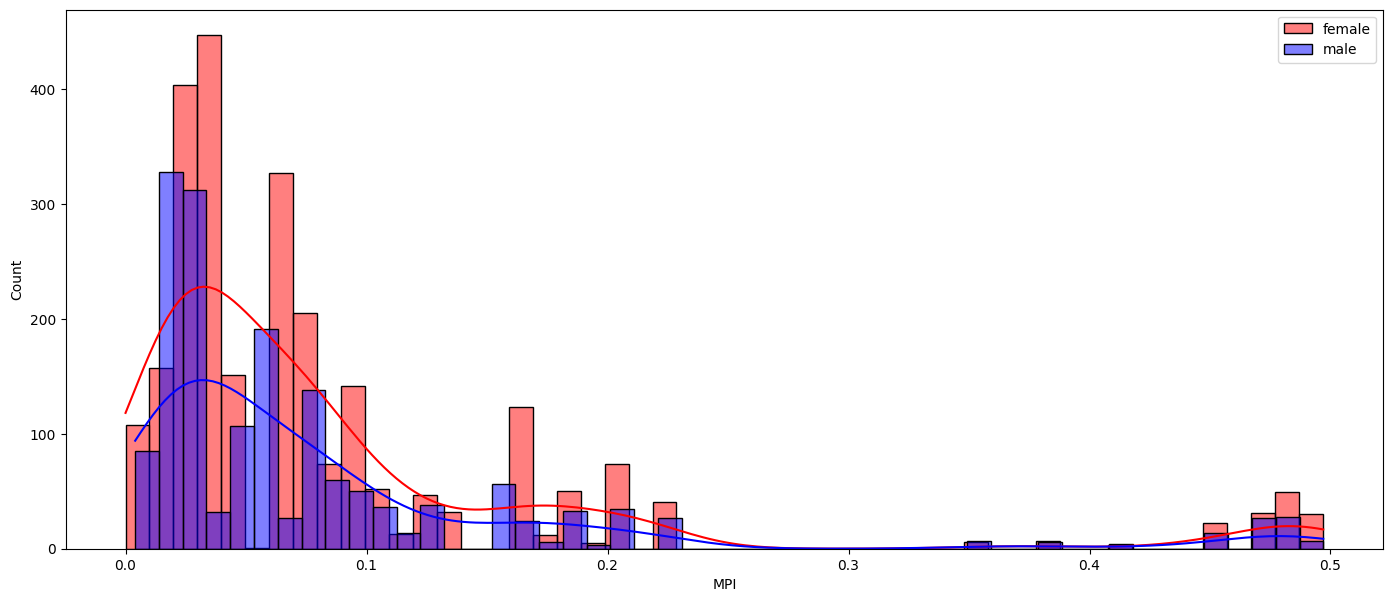

In [22]:
# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(17, 7))

# Гистограмма для женщин
sns.histplot(d.loc[d['gender']=='female'].MPI, label='female', ax=ax, color='r', bins=50, kde=True)

# Гистограмма для мужчин
sns.histplot(d.loc[d['gender']=='male'].MPI, label='male', ax=ax, color='b', bins=50, kde=True)

# Добавление легенды и отображение графика
plt.legend()
plt.show()


Распределения MPI для мужчин и женщин практически совпадают, поэтому мы приходим к выводу, что нет различий в уровнях бедности между мужчинами и женщинами заемщиками.

Теперь давайте рассмотрим отрасли. Есть ли различия в уровнях бедности заемщиков, фокусирующих свою деятельность в различных секторах?


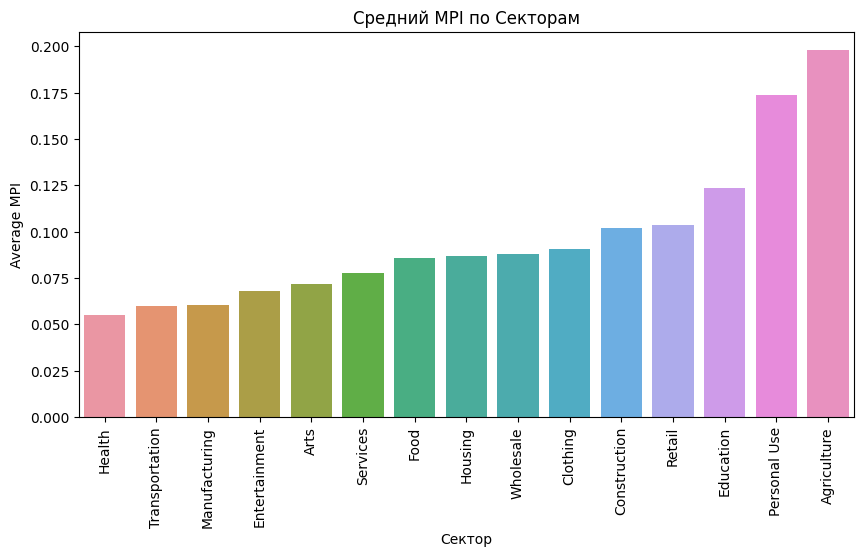

In [23]:


# Группировка данных по секторам и расчет среднего значения MPI для каждого сектора
df_sector = d.groupby(['sector'])['MPI'].mean().sort_values(ascending=True).reset_index(name="Average MPI")

# Создание визуализации
plt.figure(figsize=(10, 5))
g = sns.barplot(x='sector', y="Average MPI", data=df_sector)

# Установка подписей для осей X и Y, а также заголовка графика
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Поворот подписей оси X для лучшей читаемости
g.set_title("Средний MPI по Секторам")  # Заголовок графика
g.set_xlabel("Сектор")  # Подпись оси X

# Отображение графика
plt.show()


Заемщики из регионов с наивысшим индексом бедности (MPI) берут деньги на сельское хозяйство, личные нужды и образование. Заемщики из регионов с наименьшим MPI берут деньги на здоровье, транспорт и производство.

Уровень активности более детализирован, чем сектор. Давайте посмотрим, на какие конкретные виды деятельности люди берут деньги в регионах с высоким и низким индексом бедности.



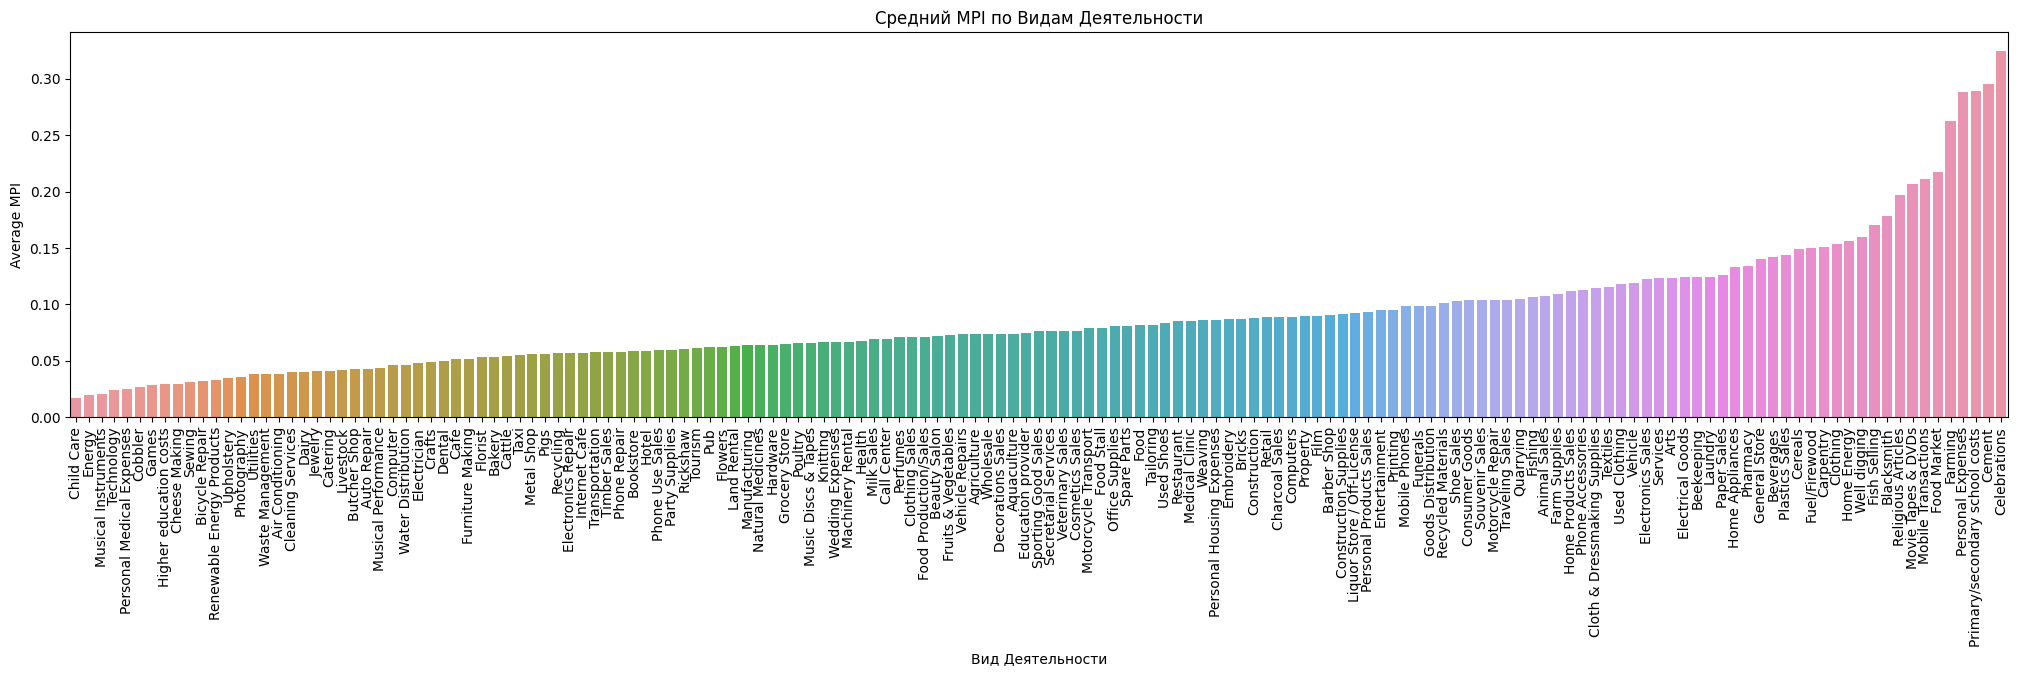

In [24]:


# Группировка данных по видам деятельности и расчет среднего значения MPI для каждой деятельности
df_activity = d.groupby(['activity'])['MPI'].mean().sort_values(ascending=True).reset_index(name="Average MPI")

# Создание визуализации
plt.figure(figsize=(25, 5))
g = sns.barplot(x='activity', y="Average MPI", data=df_activity)

# Установка подписей для осей X и Y, а также заголовка графика
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Поворот подписей оси X для лучшей читаемости
g.set_title("Средний MPI по Видам Деятельности")  # Заголовок графика
g.set_xlabel("Вид Деятельности")  # Подпись оси X

# Отображение графика
plt.show()


В регионах с высоким индексом бедности (MPI) люди занимают деньги на проведение праздников, образование начальной/средней школы и сельское хозяйство.  Люди в регионах с низким MPI берут займы для оплаты услуг по уходу за детьми, энергетических нужд, музыкальных инструментов и технологий.


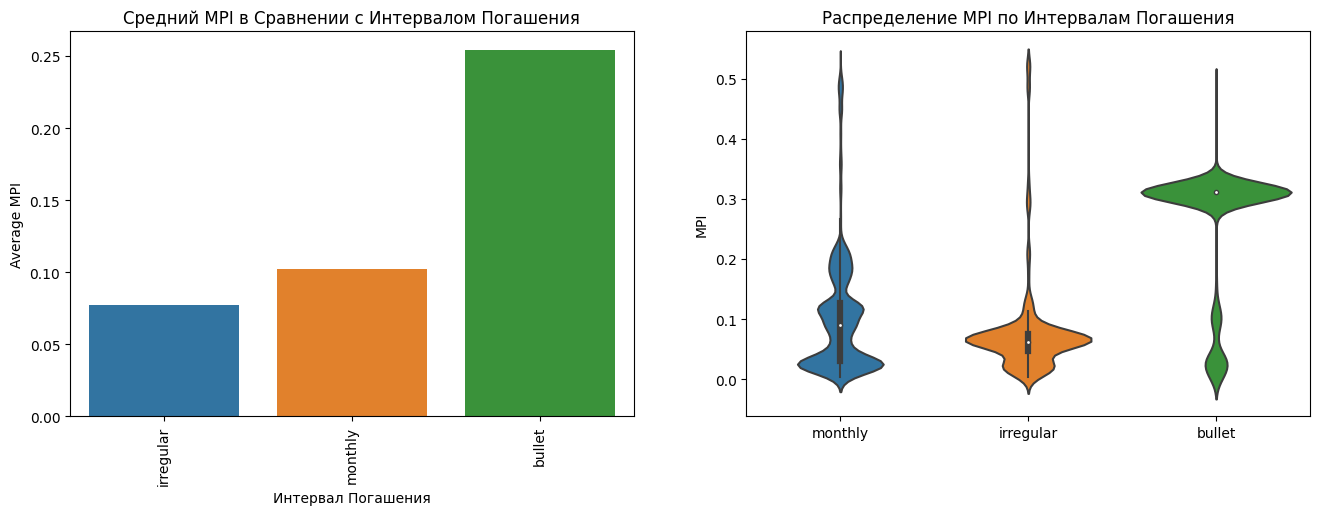

In [25]:
# Группировка данных по интервалам погашения и расчет среднего значения MPI для каждого интервала
df_repayment_interval = d.groupby(['repayment_interval'])['MPI'].mean().sort_values(ascending=True).reset_index(name="Average MPI")

# Создание визуализации
plt.figure(figsize=(16, 5))

# Подграфик 1: Средний MPI в зависимости от интервала погашения
plt.subplot(121)
g = sns.barplot(x='repayment_interval', y="Average MPI", data=df_repayment_interval)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Средний MPI в Сравнении с Интервалом Погашения")
g.set_xlabel("Интервал Погашения")

# Подграфик 2: Распределение MPI по интервалам погашения
plt.subplot(122)
g1 = sns.violinplot(x='repayment_interval', y='MPI', data=d)
g1.set_title("Распределение MPI по Интервалам Погашения")
g1.set_xlabel("")
g1.set_ylabel("MPI")

# Отображение графиков
plt.show()


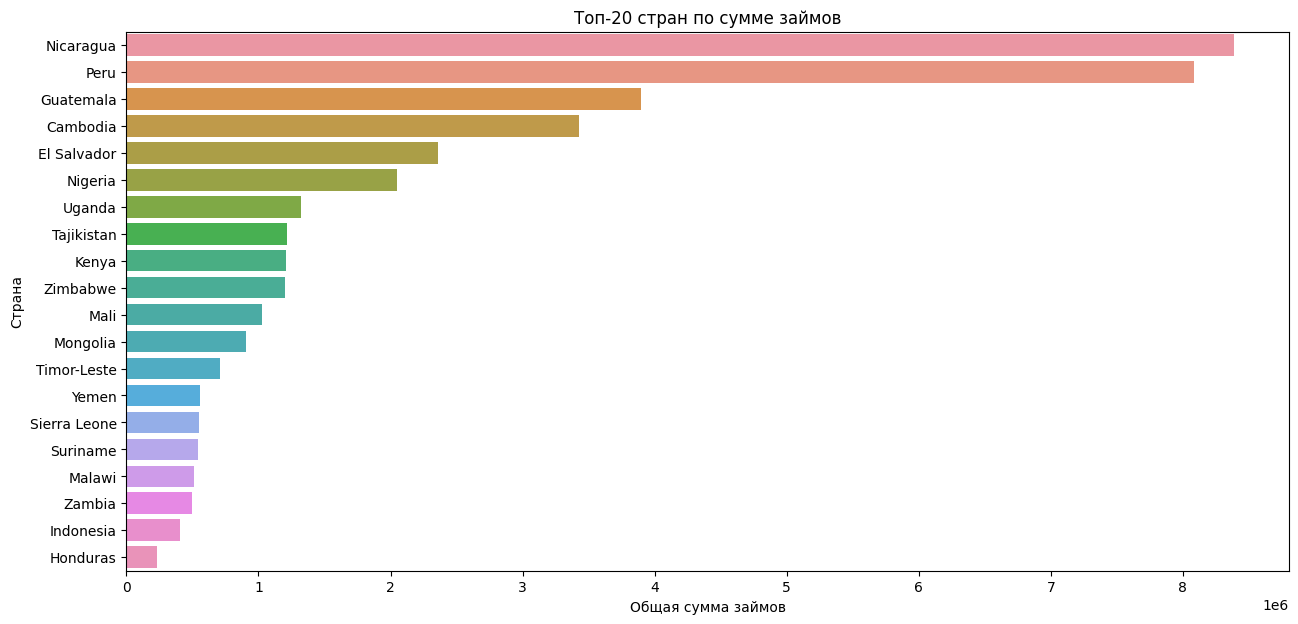

In [26]:
df_country_loan = d.groupby('country')['loan_amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(x='loan_amount', y='country', data=df_country_loan.head(20))
plt.title('Топ-20 стран по сумме займов')
plt.xlabel('Общая сумма займов')
plt.ylabel('Страна')
plt.show()


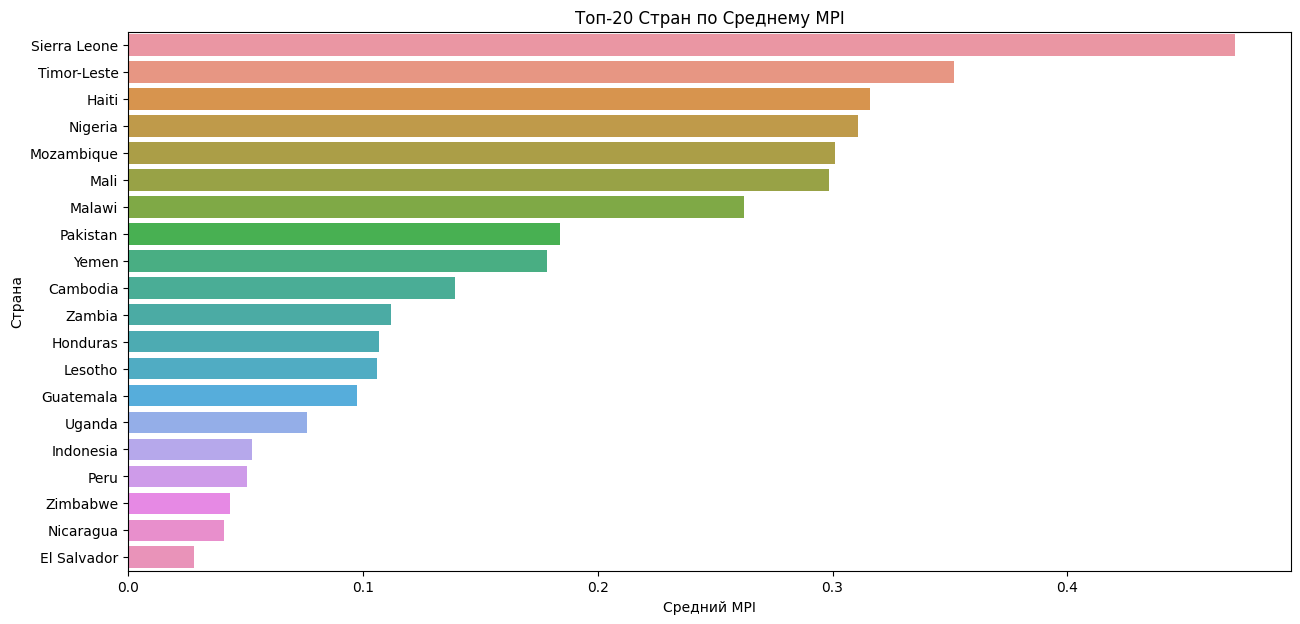

In [27]:
df_country_mpi = d.groupby('country')['MPI'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(x='MPI', y='country', data=df_country_mpi.head(20))
plt.title('Топ-20 Стран по Среднему MPI')
plt.xlabel('Средний MPI')
plt.ylabel('Страна')
plt.show()



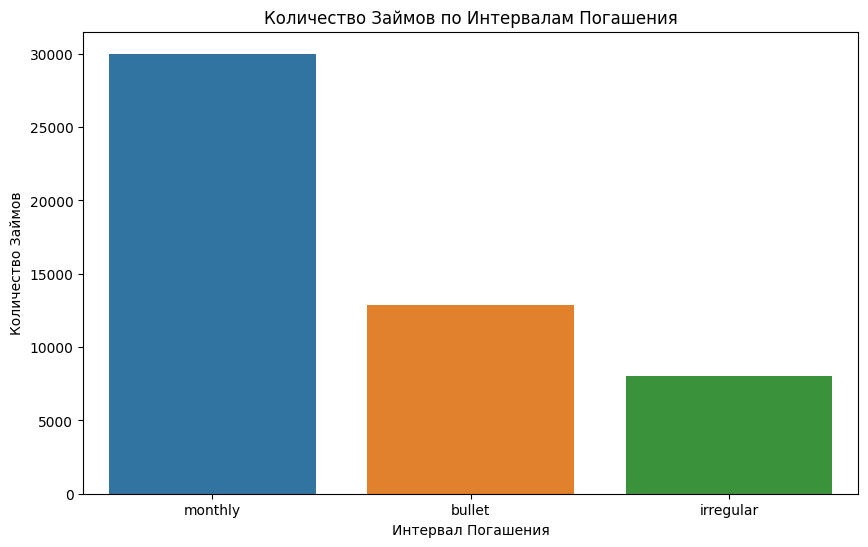

In [28]:
df_repayment_count = d['repayment_interval'].value_counts().reset_index()
df_repayment_count.columns = ['repayment_interval', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='repayment_interval', y='count', data=df_repayment_count)
plt.title('Количество Займов по Интервалам Погашения')
plt.xlabel('Интервал Погашения')
plt.ylabel('Количество Займов')
plt.show()



## Анализ Займов Kiva и Уровней MPI

### Введение
В рамках нашего исследования мы сосредоточились на анализе займов, предоставленных через Kiva, и уровнях многофакторной бедности (MPI) в регионах, откуда родом заемщики. Основная цель анализа заключалась в выявлении тенденций и закономерностей, которые могут помочь в понимании динамики бедности и кредитования.

### Основные Наблюдения
1. **Влияние MPI на Количество и Сумму Займов**: Наши данные показывают, что в регионах с более высокими уровнями MPI количество и сумма займов уменьшаются. Это указывает на то, что более бедные регионы сталкиваются с ограниченным доступом к финансовым ресурсам.

2. **Бюллетенные Займы и Их Распределение**: Мы обнаружили, что бюллетенные займы чаще встречаются в регионах с высоким MPI. Однако, наличие большого количества таких займов в Нигерии, Кадуна, может искажать общую картину. Это подчеркивает необходимость более детального анализа данных.

3. **Различия в Уровнях Бедности по Полу Заемщиков**: Наш анализ не выявил значительных различий в уровнях бедности между мужчинами и женщинами-заемщиками. Это может указывать на равномерное распределение финансовых возможностей между полами в контексте займов Kiva.

### Секторы и Виды Деятельности
Мы также исследовали, какие секторы и виды деятельности наиболее нуждаются в финансировании в регионах с различными уровнями MPI. Это позволит Kiva и ее партнерам более целенаправленно распределять ресурсы.

### Заключение и Дальнейшие Шаги
Основной вывод нашего исследования заключается в том, что доступные данные MPI охватывают лишь небольшую часть (8%) от всего объема займов Kiva. Это подчеркивает необходимость поиска дополнительных внешних источников данных для более полного и всестороннего анализа. В будущем мы планируем интегрировать дополнительные данные для улучшения нашего понимания уровней бедности и их влияния на кредитование.
